# Práctica Regresión Lineal

Primero, descargamos el dataset llamado "Filadelfia_dataset.csv" desde la siguiente url:

https://drive.google.com/drive/folders/1DoPdyeCuK6KOOqSiLdzjl26M5d9iTeH9?usp=sharing

In [4]:
import pandas as pd

##Exploramos algunos datos del valor de la vivienda frente a la tasa de criminalidad

El conjunto de datos es de Filadelfia, Pensilvania, e incluye el precio medio de venta de las casas en una serie de barrios.  Los atributos de cada barrio que tenemos incluyen el índice de criminalidad ('CrimeRate'), la distancia (en millas) desde el centro de la ciudad ('MilesPhila'), el nombre de la ciudad ('Name'), y el nombre del condado ('County').

In [5]:
#Cargamos el csv.

df_sales = pd.read_csv('datasets/Filadelfia_dataset.csv')

df_sales

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


## Explorando los datos.

El precio de las casas en la ciudad está correlado con el índice de criminalidad en cada ciudad. Las ciudades con una tasa baja de criminalidad suelen tener un precio más alto y viceversa

In [6]:
import plotly.express as px


fig = px.scatter(df_sales, x='CrimeRate', y='HousePrice')
fig.show()

## Entrenamos un modelo de regresión utilizado el crimen como variable de entrada

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [8]:
X = df_sales.CrimeRate.values.reshape(-1,1)
Y = df_sales.HousePrice

#Creamos un objeto de la clase linear_regression
model_crime = LinearRegression()

#Entrenamos con el training set.
model_crime.fit(X, Y)

#Predecimos la salida del modelo pasandole el conjunto de test.
predictions = model_crime.predict(X)




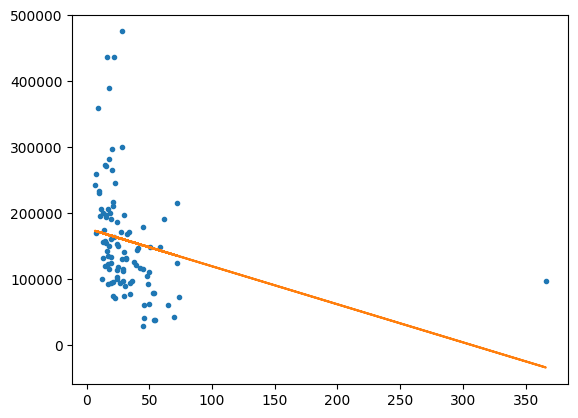

In [9]:
plt.plot(df_sales['CrimeRate'], df_sales['HousePrice'], '.',
         df_sales['CrimeRate'], predictions, '-'
         )

En naranja vemos nuestro modelo de regresión lineal simple ajustado. (es decir, nuestras predicciones de los valores de la casa para cada crimen). Vemos un valor a la derecha que parece ser un valor fuera de lo común.

## Eliminamos el centro y rehacemos el Análisis

El caso del centro de la ciudad es la única observación con un índice de criminalidad extremadamente alto, aunque los precios de la vivienda no son muy bajos. Si nos fijamos, este punto no sigue muy bien la tendencia del resto de datos. Habría que preguntarse cuanto influye en el ajuste de los demás puntos de datos. Vamos a eliminarlo a ver qué ocurre

In [10]:
df_sales.loc[df_sales['MilesPhila'] == 0.0]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [11]:
df_sales_cc = df_sales.loc[df_sales['MilesPhila'] != 0.0]

In [12]:
fig = px.scatter(df_sales_cc, x='CrimeRate', y='HousePrice')
fig.show()

In [13]:
#Vemos que ahora los datos ya están mucho mas cercanos. 

### Reentrenamos el modelo

In [14]:
X = df_sales_cc.CrimeRate.values.reshape(-1,1)
Y = df_sales_cc.HousePrice

#Creamos un objeto de la clase linear_regression
model_crime_cc = LinearRegression()

#Entrenamos con el training set.
model_crime_cc.fit(X, Y)

#Predecimos la salida del modelo pasandole el conjunto de test.
predictions_cc = model_crime_cc.predict(X)




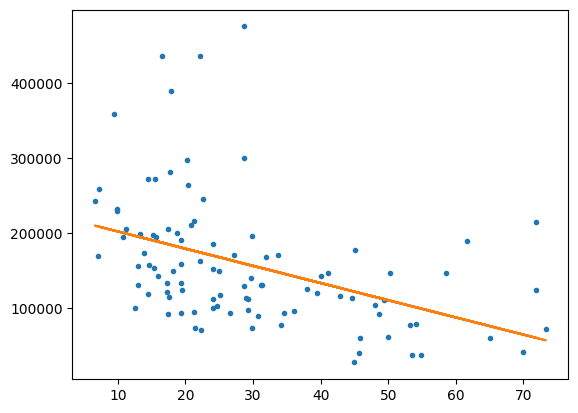

In [15]:
plt.plot(df_sales_cc['CrimeRate'], df_sales_cc['HousePrice'], '.',
         df_sales_cc['CrimeRate'], predictions_cc, '-'
         )

Vemos que hay un mucho mejor ajuste del modelo a los datos. Pero para ser más explicitos, vamos a comparar los coeficientes entre los dos modelos

## Comparamos los coeficientes para el modelo con todos los datos y el modelo sin el valor del centro

Visualmente, el ajuste parece diferente, pero vamos a cuantificarlo examinando los coeficientes estimados de nuestro ajuste original y el del conjunto de datos modificado con el centro de la ciudad eliminado.

In [16]:
print("El coeficiente para CrimeRate es: ", model_crime.coef_)
print("El intercept value es ", model_crime.intercept_)

El coeficiente para CrimeRate es:  [-576.90812768]
El intercept value es  176629.40810695427


In [17]:
print("El coeficiente para CrimeRate es: ", model_crime_cc.coef_)
print("El intercept value es ", model_crime_cc.intercept_)

El coeficiente para CrimeRate es:  [-2288.68942995]
El intercept value es  225233.5518390038


Cuando la vivienda del centro de la ciudad, teníamos que el precio de la vivienda decrece una media de 577$ por cada unidad que incrementa la tasa de crimen.- 


En cambio, cuando quitamos únicamente una observación, el precio de la viviena decrece 2287$ por cada unidad que incrementa la tasa de crimen. Es una diferencia significativa enorme por un solo punto.

### Puntos de Gran influencia: 

Se dice que el centro de la ciudad es un punto de "alto apalancamiento" porque se encuentra en un valor extremo de x donde no hay otras observaciones.  Como resultado, recordando la solución de forma cerrada para la regresión simple, este punto tiene el *potencial* de cambiar drásticamente la línea de mínimos cuadrados ya que el centro de la masa x está fuertemente influenciado por este punto y la línea de mínimos cuadrados intentará ajustarse cerca de ese punto 'anómalo' (en x).  Si un punto de alta influencia sigue la tendencia de los otros datos, esto podría no tener mucho efecto.  Por otro lado, si este punto difiere de alguna manera, puede ser muy influyente en el ajuste resultante.

### Observaciones influyentes:  
Una observación influyente es aquella en la que la eliminación del punto cambia significativamente el ajuste.  Como se ha comentado anteriormente, los puntos de apalancamiento alto son buenos candidatos para ser observaciones influyentes, pero no tienen por qué serlo.  Otras observaciones que *no* son puntos de apalancamiento también pueden ser observaciones influyentes (por ejemplo, fuertemente periféricas en y incluso si x es un valor típico).

## Visualizando los dos modelos

Confirmamos los cálculos anteriores observando los gráficos. La línea naranja es el modelo entrenado eliminando Center City, y la línea verde es el modelo entrenado con todos los datos. Obsérvese que la línea verde es mucho más pronunciada, ya que la caída del valor es mucho mayor según este modelo.

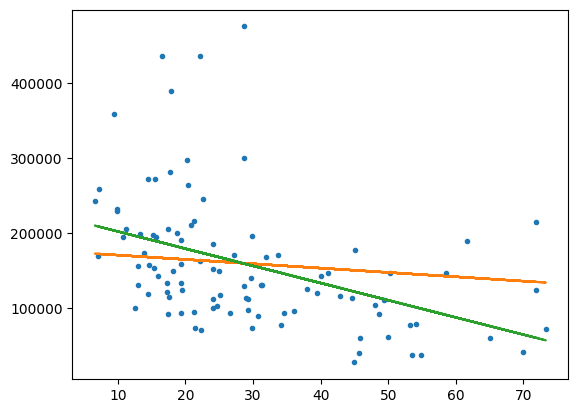

In [18]:
plt.plot(df_sales_cc['CrimeRate'], df_sales_cc['HousePrice'], '.',
         df_sales_cc['CrimeRate'], model_crime.predict(df_sales_cc.CrimeRate.values.reshape(-1,1)), '-',
         df_sales_cc['CrimeRate'], predictions_cc, '-'
         )

## Eliminamos los valores atípicos de los barrios de alto valor y rehacemos el análisis.

Basándonos el ejemplo anterior, cabe preguntarse si las ciudades periféricas de alto valor están influyendo mucho en el ajuste.  Eliminémos los 5 valores más altos y veremos qué ocurre

In [19]:
# Eliminar los barrios atípicos de alto valor y rehacer el análisis.

df_sales_out = df_sales_cc[df_sales_cc['HousePrice'] < 350000]

X = df_sales_out.CrimeRate.values.reshape(-1,1)
Y = df_sales_out.HousePrice

#Creamos un objeto de la clase linear_regression
model_crime_out = LinearRegression()

#Entrenamos con el training set.
model_crime_out.fit(X, Y)

#Predecimos la salida del modelo pasandole el conjunto de test.
predictions_out = model_crime_out.predict(X)

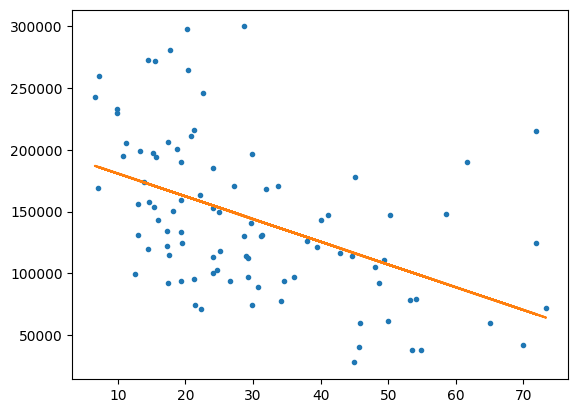

In [22]:
plt.plot(df_sales_out['CrimeRate'], df_sales_out['HousePrice'], '.',
         df_sales_out['CrimeRate'], predictions_out, '-'
         )

### ¿Cambian mucho los coeficientes?

In [24]:
print("El coeficiente con los outliers es: ", model_crime_cc.coef_)
print("El intercept con outliers es es ", model_crime_cc.intercept_)
# de out
print("El coeficiente con los outliers es: ", model_crime_out.coef_)
print("El intercept con outliers es es ", model_crime_out.intercept_)

El coeficiente con los outliers es:  [-2288.68942995]
El intercept con outliers es es  225233.5518390038
El coeficiente con los outliers es:  [-1838.56264859]
El intercept con outliers es es  199098.85266980447
